<h1> LABORATORIO 6  APRENDIZAJE NO SUPERVISADO</h1>
<h2> ING DE SISTEMAS</h2>
<h3> Juan Sebastian Delgadillo Llanos</h3>
<h3> Rodrigo Jairo Loaiza Coronado</h3>
<h3> Diego Roberto Arancibia Delgado</h3>



In [2]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv('/content/drive/MyDrive/SIS420/LABORATORIOS/Lab6/Churn_Modelling.csv', delimiter=";")

data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
# Paso 2: Preprocesamiento de datos
# Convertir características categóricas en variables numéricas usando codificación de etiquetas
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# Paso 4: Entrenar el modelo K-Means
k = 3
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(scaled_data)

# Paso 5: Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Paso 6: Analizar los resultados y realizar cualquier postprocesamiento necesario
data['Cluster'] = labels



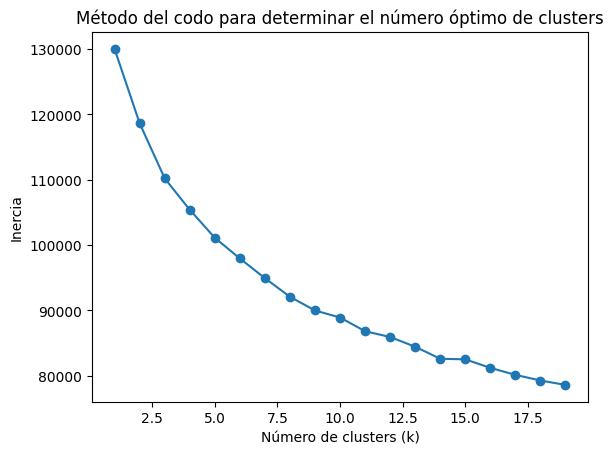

In [7]:
# Método del codo
inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()


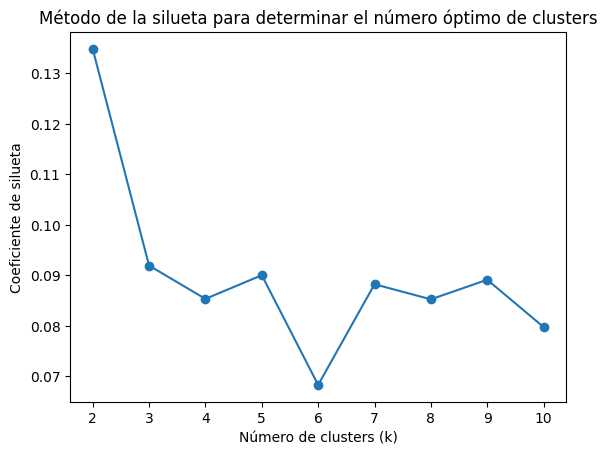

In [8]:
# Método de la silueta
silhouette_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Coeficiente de silueta')
plt.title('Método de la silueta para determinar el número óptimo de clusters')
plt.xticks(k_range)
plt.show()

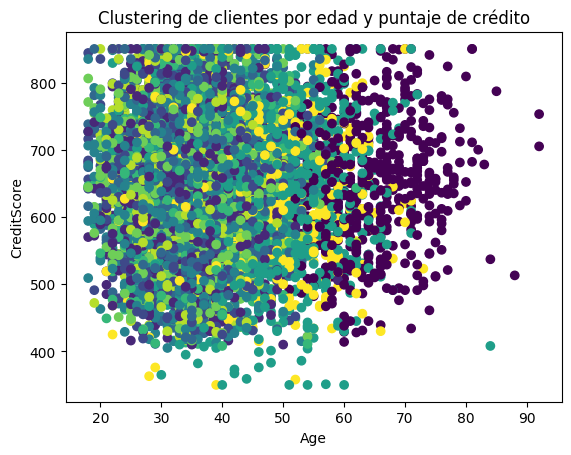

In [9]:
# Trama de dispersión de los clusters
plt.scatter(data['Age'], data['CreditScore'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Clustering de clientes por edad y puntaje de crédito')
plt.show()


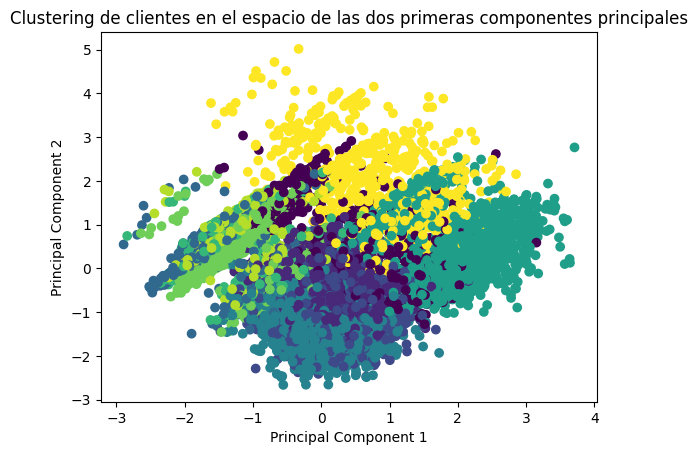

In [10]:
# Reducción de dimensionalidad con PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de clientes en el espacio de las dos primeras componentes principales')
plt.show()


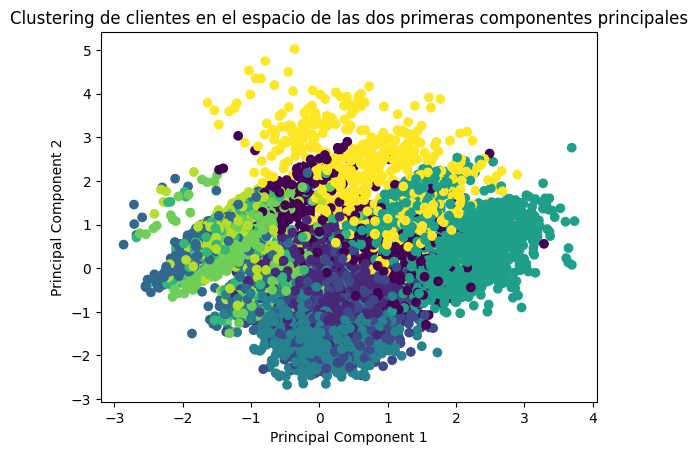

In [11]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Trama de dispersión de los clusters en las dos primeras componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering de clientes en el espacio de las dos primeras componentes principales')
plt.show()

In [12]:
# Separar los datos en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
X_train = train_data.drop(['Exited', 'CustomerId', 'Surname', 'Cluster'], axis=1)
y_train = train_data['Exited']
X_test = test_data.drop(['Exited', 'CustomerId', 'Surname', 'Cluster'], axis=1)
y_test = test_data['Exited']

print('-' * 80)
print(f"El 80% de ejemplos que serán para el entrenamiento son: {len(X_train)}")
print(f"El 20% de ejemplos que serán para el prueba son: {len(X_test)}")

--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 8000
El 20% de ejemplos que serán para el prueba son: 2000


In [13]:
# Normalizar los datos
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

In [14]:
X_train_

array([[ 1.4692775 ,  0.35649971, -0.9055496 , ...,  0.64920267,
         0.97481699,  1.36766974],
       [-1.19499359, -0.20389777,  0.30164867, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-1.15724427, -0.96147213,  1.50884694, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 0.13108128,  0.86500853, -0.9055496 , ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [-1.43776677,  0.15932282, -0.9055496 , ...,  0.64920267,
        -1.02583358, -0.05082558],
       [ 0.78217054,  0.47065475,  0.30164867, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [15]:
# KMeans clustering on training data
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(X_train_)
train_data['kmeans_3'] = kmeans.labels_

# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# luego transforma estos datos en distancias euclidianas a los centroides de los clusters.
X_digits_dist = kmeans.fit_transform(X_train_)


In [16]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(8000, 3)
[[2.67419599 3.78404588 3.57788293]
 [3.10611406 3.47855824 2.77966629]
 [3.7884933  3.88012495 2.9868808 ]
 ...
 [3.80205232 3.70933149 4.80652072]
 [4.0532112  3.87399316 2.73592631]
 [3.71279027 3.65127687 2.66838335]]


In [17]:
# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Porcentaje de precisión:", accuracy)

Porcentaje de precisión: 0.797


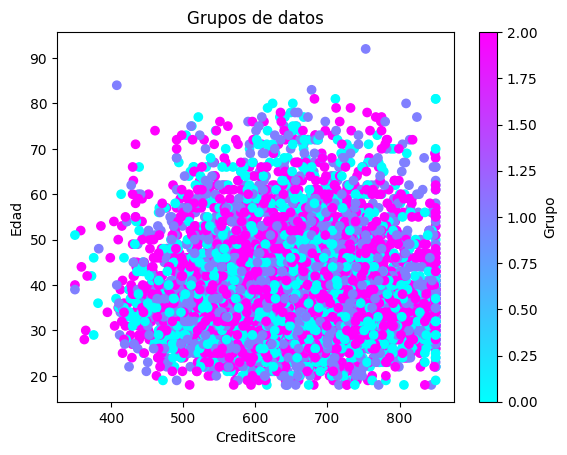

In [18]:
# Graficar los grupos
plt.scatter(train_data['CreditScore'], train_data['Age'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('CreditScore')
plt.ylabel('Edad')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

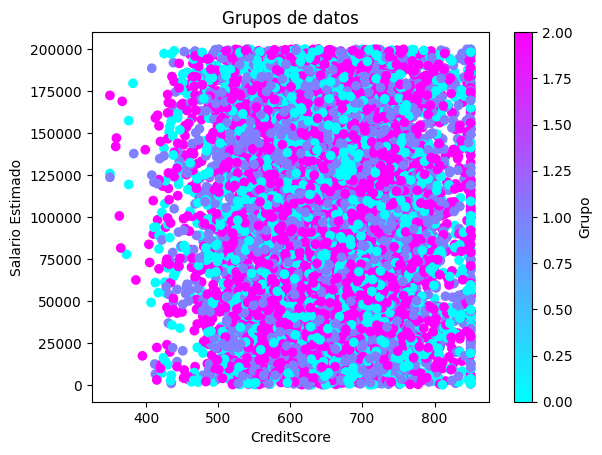

In [19]:
plt.scatter(train_data['CreditScore'], train_data['EstimatedSalary'], c=train_data['kmeans_3'], cmap='cool')
plt.xlabel('CreditScore')
plt.ylabel('Salario Estimado')
plt.title('Grupos de datos')
plt.colorbar(label='Grupo')
plt.show()

In [20]:
# Supongamos que tienes algunos datos para predecir
# Por ejemplo, tomaremos la primera fila del conjunto de prueba
# Asegúrate de ajustar los datos según corresponda a tu conjunto de datos
datos_nuevos = X_test.iloc[1000]

# Convertir datos_nuevos a un DataFrame con los nombres de las columnas preservados
datos_nuevos_df = pd.DataFrame([datos_nuevos], columns=X_test.columns)

# Realizar la predicción utilizando el modelo entrenado
prediccion = logistic_regression.predict(datos_nuevos_df)

# Imprimir la predicción
print("Predicción:", prediccion)



Predicción: [0]


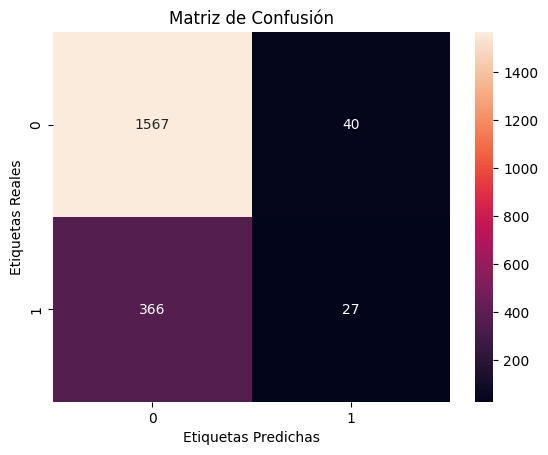

In [21]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Matriz de Confusión')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Reales')
plt.show()

# **APRENDIZAJE SEMI SUPERVIZADO**
Imagina que el dataset no estuviese etiquetado, es decir, que tuviésemos solo los dígitos sin la clase (sólo  X  y no  y ) y tampoco supiésemos cuantas clases diferentes tenemos. Lo primero que podríamos hacer es entrenar un modelo de K-Means con, por ejemplos, 50 grupos. De esta manera encontraremos aquellas imágenes más representativas de cada grupo.

In [29]:
k = 50
kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)

In [32]:
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]

print(X_representative_digits)

[[4.9050000e+03 7.4100000e+02 0.0000000e+00 0.0000000e+00 4.4000000e+01
  7.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+00 1.0000000e+00
  1.9053476e+05]
 [5.4340000e+03 5.7700000e+02 0.0000000e+00 1.0000000e+00 3.7000000e+01
  2.0000000e+00 1.2726135e+05 1.0000000e+00 1.0000000e+00 0.0000000e+00
  5.6185050e+04]
 [4.4940000e+03 8.2500000e+02 2.0000000e+00 0.0000000e+00 3.2000000e+01
  1.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+00 1.0000000e+00
  4.2935150e+04]
 [4.5600000e+03 5.2800000e+02 1.0000000e+00 0.0000000e+00 6.2000000e+01
  7.0000000e+00 1.3320117e+05 1.0000000e+00 0.0000000e+00 0.0000000e+00
  1.6850768e+05]
 [5.9750000e+03 7.7300000e+02 0.0000000e+00 1.0000000e+00 4.5000000e+01
  8.0000000e+00 9.6877210e+04 1.0000000e+00 1.0000000e+00 1.0000000e+00
  1.1395051e+05]
 [5.0980000e+03 6.5000000e+02 2.0000000e+00 1.0000000e+00 2.0000000e+01
  8.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+00 1.0000000e+00
  1.1346965e+05]
 [1.3660000e+03 6.2500000e+02 0.00

In [33]:
y_representative_digits = y_train.values[idxs]

Y entrenaremos un clasificados usando estas imágenes representativas.

In [34]:
log_reg2 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg2.fit(X_representative_digits, y_representative_digits)
log_reg2.score(X_test, y_test)

CPU times: user 18.6 ms, sys: 0 ns, total: 18.6 ms
Wall time: 32.1 ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.78

Como puedes observar hemos obtenido una precisión de casi el  80  habiendo anotado simplemente 50 datos, pero aquellas más representativas. Entrenar el mismo modelo con 50 datos aleatorias nos daría peores resultados.

In [35]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg.fit(X_train[:50], y_train[:50])
log_reg.score(X_test, y_test)

CPU times: user 16.6 ms, sys: 149 µs, total: 16.7 ms
Wall time: 30.8 ms


0.7205

Esto pone de manifiesto que a la hora de entrenar modelos de ML no es tan importante la cantidad de datos, sino la calidad.

Ahora que tenemos un clasificador, podemos usarlo para anotar de manera automática el resto de datos. Para ello asignaremos, en cada grupo, la misma etiqueta a todas las muestras que la muestra representativa.

In [36]:
y_train_propagated = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [37]:
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg3.fit(X_train[:1000], y_train_propagated[:1000])
log_reg3.score(X_test, y_test)

CPU times: user 23.2 ms, sys: 28.2 ms, total: 51.4 ms
Wall time: 94.4 ms


0.796

# **APRENDIZAJE ACTIVO**

El aprendizaje activo (o Active Learning) consiste en entrenar modelos de ML de manera iterativa, incluyendo en cada iteración nuevas muestras al dataset focalizando en ejemplos en loa que el modelo tenga más problemas.

In [38]:
probas = log_reg3.predict_proba(X_train[:1000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.50255934, 0.50696207, 0.50849529, 0.51159026, 0.51159833,
       0.51272815, 0.51280103, 0.51378315, 0.51427191, 0.51609806])

In [39]:
print(X_train.values)

[[9.2550000e+03 6.8600000e+02 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.7909326e+05]
 [1.5620000e+03 6.3200000e+02 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.9597886e+05]
 [1.6710000e+03 5.5900000e+02 2.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 8.5891020e+04]
 ...
 [5.3910000e+03 7.3500000e+02 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 9.2220120e+04]
 [8.6100000e+02 6.6700000e+02 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.7508040e+04]
 [7.2710000e+03 6.9700000e+02 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 5.3581140e+04]]


In [40]:
y_lowest = y_train.values[:1000][sorted_ixs[:k]]
y_lowest

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0])

In [41]:
y_train2 = y_train_propagated[:1000].copy()
y_train2[sorted_ixs[:k]] = y_lowest

In [42]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg5.fit(X_train[:1000], y_train2)
log_reg5.score(X_test, y_test)

CPU times: user 35 ms, sys: 22 ms, total: 57.1 ms
Wall time: 61.8 ms


0.795

Podemos repetir el proceso tantas veces como haga falta hasta llegar a las prestaciones requeridas.